#### Importing Basic Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the dataset:

In [2]:
df = pd.read_csv("Delivery time/deliverytime.txt")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
## Checking Null Values
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

#### Calculating Distance Between Two Latitudes and Longitudes:
- Using the haversine formula to calculate the distance between two locations based on their latitudes and longitudes

In [5]:
# The earth's radius is about 6,371
R = 6371

# Converting latitude and longitude to radians
def deg_to_rad(deg):
    return deg * (np.pi/180)

# Calculating distance between two points on earth using Haversine formula
def haversine(lat1,lon1,lat2,lon2):
    lat_difference = deg_to_rad(lat2-lat1)
    lon_difference = deg_to_rad(lon2-lon1)
    a = np.sin(lat_difference/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(lon_difference/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return R * c
# Calculate the distance between the restaurant and the customer
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i,'distance'] = haversine(df.loc[i,'Restaurant_latitude'],
                                     df.loc[i,'Restaurant_longitude'],
                                     df.loc[i,'Delivery_location_latitude'],
                                     df.loc[i,'Delivery_location_longitude'])
    

In [6]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


#### Data Exploration:

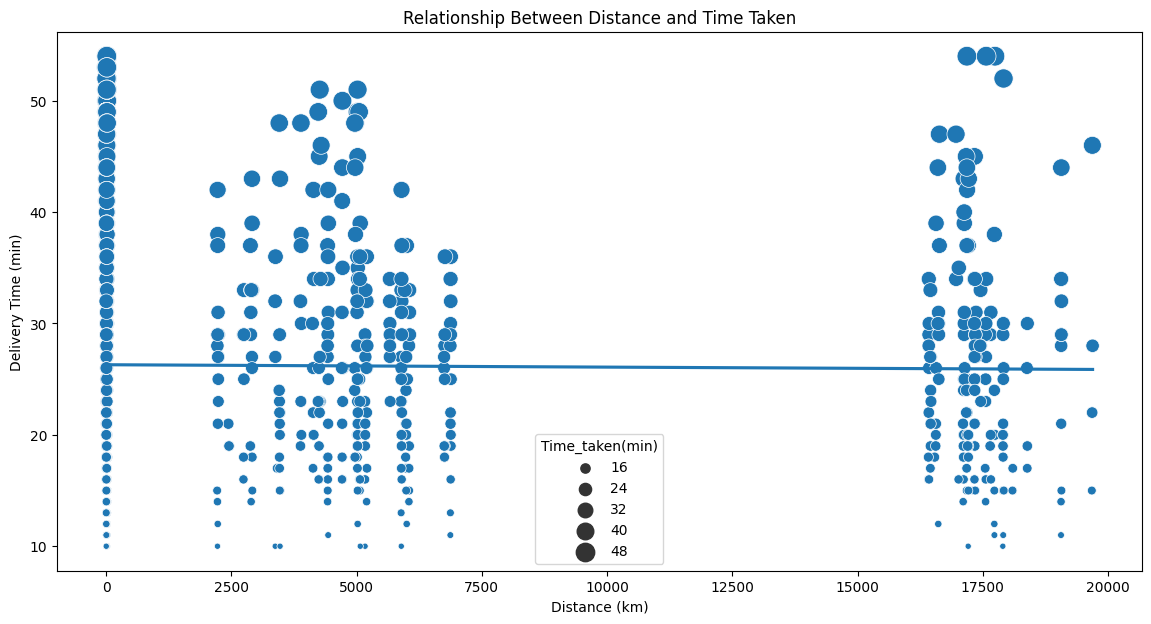

In [7]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='distance', y='Time_taken(min)', data=df, size='Time_taken(min)', sizes=(20, 200))
sns.regplot(x='distance', y='Time_taken(min)', data=df, scatter=False, ci=None)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.title('Relationship Between Distance and Time Taken')
plt.show()


- There is a consistent relationship between the time taken and the distance travelled to deliver the food. It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

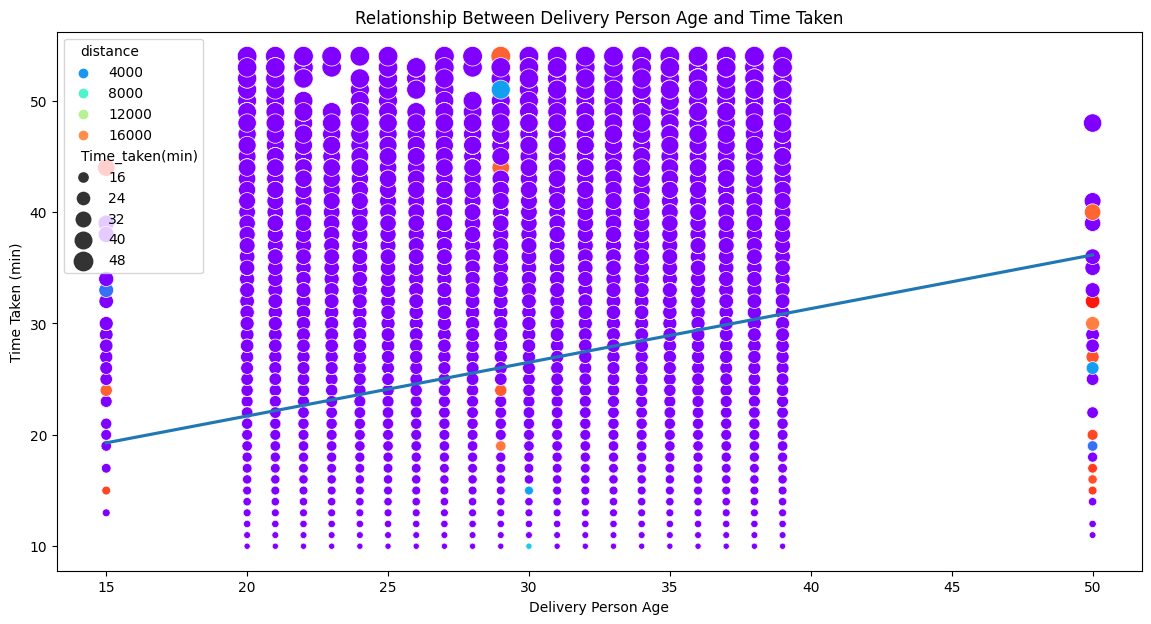

In [11]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x = 'Delivery_person_Age',y = 'Time_taken(min)',size='Time_taken(min)',data = df,sizes=(20,200),hue='distance',palette='rainbow')
sns.regplot(x = 'Delivery_person_Age',y = 'Time_taken(min)',data = df,scatter = False,ci = None)
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Delivery Person Age and Time Taken')
plt.show()

- There is a linear relationship between the time taken to deliver the food and the age of the delivery partner. It means young delivery partners take less time to deliver the food compared to the elder partners

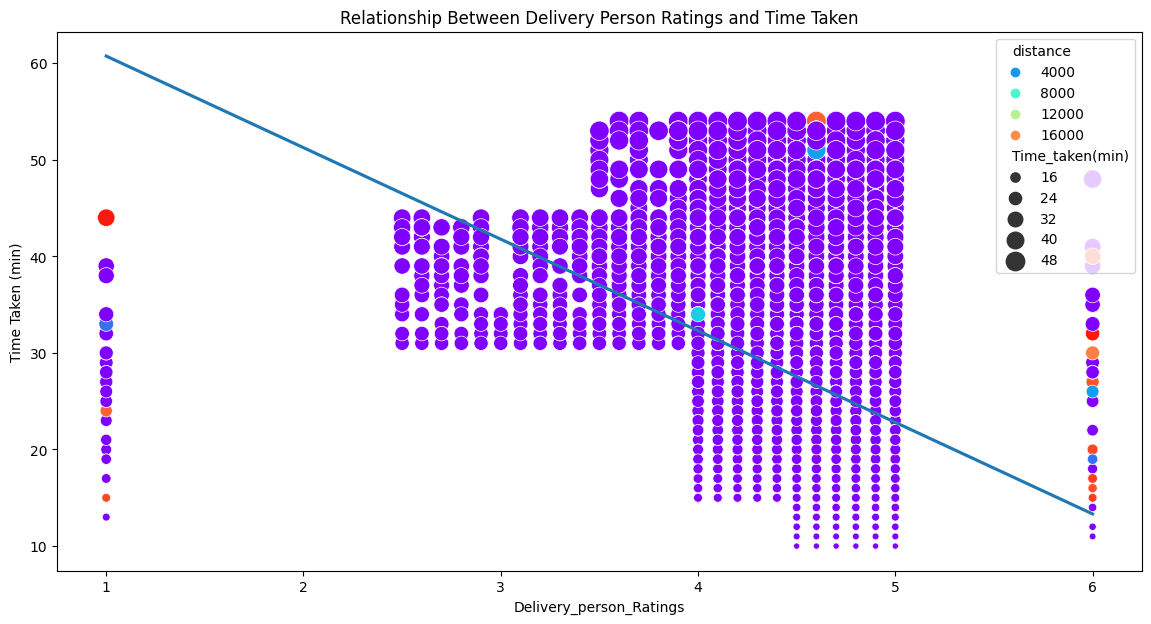

In [10]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x = 'Delivery_person_Ratings',y = 'Time_taken(min)',size='Time_taken(min)',data = df,sizes=(20,200),hue='distance',palette='rainbow')
sns.regplot(x = 'Delivery_person_Ratings',y = 'Time_taken(min)',data = df,scatter = False,ci = None)
plt.xlabel
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Delivery Person Ratings and Time Taken')
plt.show()

- There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

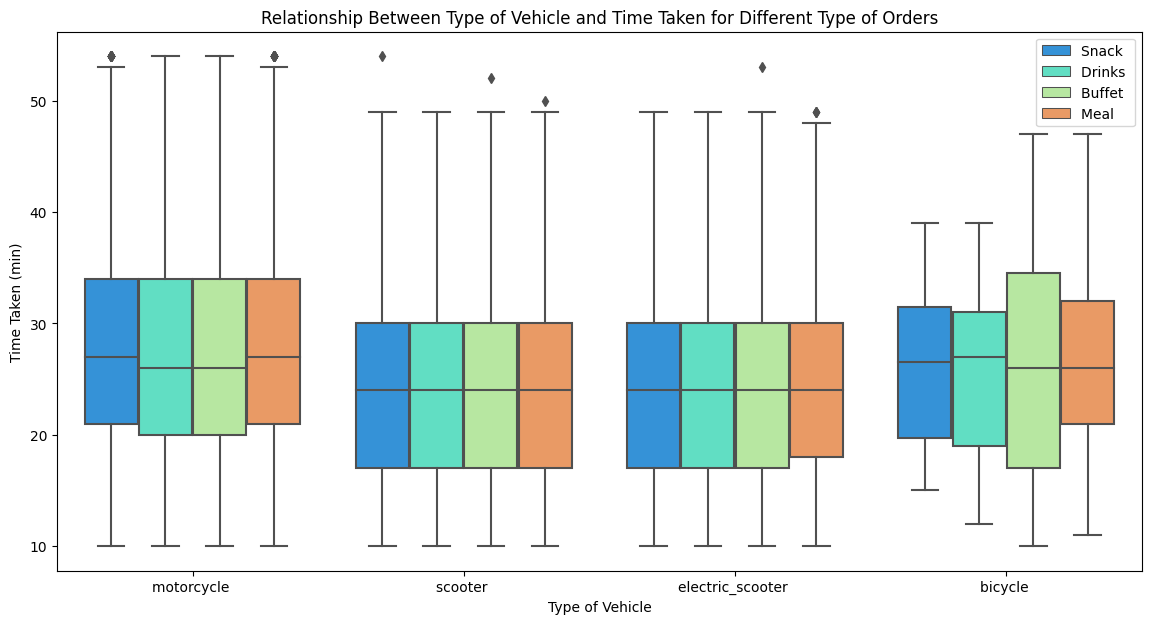

In [18]:
plt.figure(figsize=(14, 7))
sns.boxplot(x = 'Type_of_vehicle',y = 'Time_taken(min)',data = df,hue='Type_of_order',palette='rainbow')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Type of Vehicle and Time Taken for Different Type of Orders')
plt.legend(loc='upper right')
plt.show()

So there is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

So the features that contribute most to the food delivery time based on our analysis are:

- age of the delivery partner
- ratings of the delivery partner
- distance between the restaurant and the delivery location

#### Food Delivery Time Prediction Model

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x = np.array(df[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "distance"]])
y = np.array(df[["Time_taken(min)"]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [24]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
41033/41033 [==============================] - 531s 13ms/step - loss: 69.4443
Epoch 2/10
41033/41033 [==============================] - 370s 9ms/step - loss: 64.2707
Epoch 3/10
41033/41033 [==============================] - 280s 7ms/step - loss: 61.5247
Epoch 4/10
41033/41033 [==============================] - 277s 7ms/step - loss: 60.5127
Epoch 5/10
41033/41033 [==============================] - 335s 8ms/step - loss: 60.2384
Epoch 6/10
41033/41033 [==============================] - 286s 7ms/step - loss: 59.6494
Epoch 7/10
41033/41033 [==============================] - 386s 9ms/step - loss: 59.2588
Epoch 8/10
41033/41033 [==============================] - 757s 18ms/step - loss: 59.3731
Epoch 9/10
41033/41033 [==============================] - 421s 10ms/step - loss: 59.7382
Epoch 10/10
41033/41033 [==============================] - 222s 5ms/step - loss: 59.9971


In [30]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print(f"Age of Delivery Partner: {a}")
print(f"Ratings of Previous Deliveries: {b}")
print(f"Total Distance: {c}")
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 33
Ratings of Previous Deliveries: 4.1
Total Distance: 13
1/1 [==============================] - 0s 29ms/step
Predicted Delivery Time in Minutes =  [[36.43859]]
